<p><img alt="Colaboratory logo" height="60px" src="https://drive.google.com/uc?export=view&id=1kQ-l200JEQvIRcIBIssTAZaWX7KnUP2K" align="left" hspace="10px" vspace="0px"></p>

**<h1>Lembar Kerja Peserta Workshop Data HOLOGY 4.0</h1>**

**************************************
Kelompok: 1

Anggota: Rizky Wahyudi

**************************************

*Dataset dan penjelasannya dapat diakses di link berikut :https://bit.ly/DatasetHOLOGY*


**Memanggil import yang dibutuhkan**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

**Memanggil data dan menampilkan 5 data teratas**

In [2]:
df = pd.read_csv('/content/country_vaccinations.csv')

df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


**Menampilkan informasi data (nama kolom, nilai yang hilang, dan tipe data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43890 entries, 0 to 43889
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              43890 non-null  object 
 1   iso_code                             43890 non-null  object 
 2   date                                 43890 non-null  object 
 3   total_vaccinations                   23954 non-null  float64
 4   people_vaccinated                    22912 non-null  float64
 5   people_fully_vaccinated              20069 non-null  float64
 6   daily_vaccinations_raw               19646 non-null  float64
 7   daily_vaccinations                   43590 non-null  float64
 8   total_vaccinations_per_hundred       23954 non-null  float64
 9   people_vaccinated_per_hundred        22912 non-null  float64
 10  people_fully_vaccinated_per_hundred  20069 non-null  float64
 11  daily_vaccinations_per_milli

**Melihat deskripsi data (jumlah data, mean, standar deviasi, median, nilai minimum, maksimum, dll)**

In [5]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.395400e+04,2.291200e+04,2.006900e+04,1.964600e+04,4.359000e+04,23954.000000,22912.000000,20069.000000,43590.000000
mean,1.939722e+07,8.314011e+06,5.179976e+06,2.608236e+05,1.303081e+05,41.891070,25.618281,18.866719,3572.434457
std,1.112796e+08,3.184113e+07,1.928807e+07,1.329277e+06,8.848659e+05,43.820258,24.023195,20.873270,4482.285466
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.962040e+05,1.601840e+05,7.646000e+04,5.017500e+03,8.500000e+02,4.970000,3.860000,2.220000,501.000000
50%,1.384025e+06,9.693695e+05,5.895910e+05,2.447250e+04,6.766000e+03,24.740000,17.360000,9.930000,2191.000000
75%,7.323569e+06,4.484088e+06,3.008567e+06,1.118322e+05,4.115100e+04,69.647500,44.372500,30.320000,5363.750000
max,2.142580e+09,1.095000e+09,9.697200e+08,2.474100e+07,2.242429e+07,234.830000,118.090000,116.740000,117497.000000


**Melihat jumlah nilai yang hilang untuk seluruh data**

In [7]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     19936
people_vaccinated                      20978
people_fully_vaccinated                23821
daily_vaccinations_raw                 24244
daily_vaccinations                       300
total_vaccinations_per_hundred         19936
people_vaccinated_per_hundred          20978
people_fully_vaccinated_per_hundred    23821
daily_vaccinations_per_million           300
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

**Melihat korelasi, terutama untuk orang yang divaksin dengan total vaksin dengan hasil 0,98 (korelasi tinggi)**

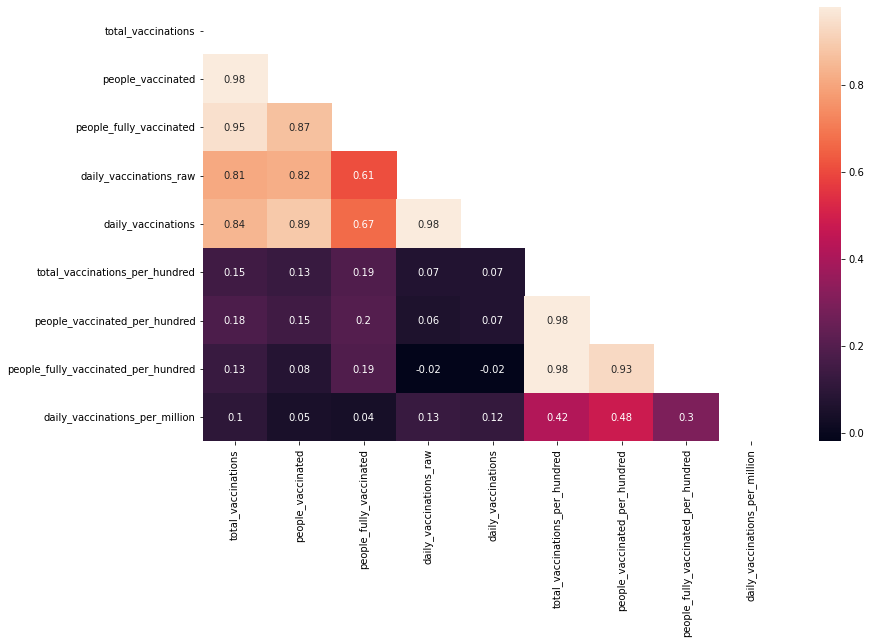

In [9]:
plt.figure(figsize=(13,8))

correlation_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data = correlation_matrix, mask=mask, annot = True)

plt.show()

**Karena cukup banyak data yang hilang, akan diambil data dari satu negara saja yaitu Indonesia**

In [10]:
df_indo = df[df["country"]=="Indonesia"]

**Mereset indek data negara Indonesia dari 0  (nol)**

In [12]:
df_indo=df_indo.reset_index(drop=True)
df_indo.head() 

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Indonesia,IDN,2021-01-12,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
1,Indonesia,IDN,2021-01-13,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
2,Indonesia,IDN,2021-01-14,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
3,Indonesia,IDN,2021-01-15,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
4,Indonesia,IDN,2021-01-16,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines


**Melihat informasi data vaksin di Indonesia**

In [13]:
df_indo.info() #informasi dari dataset vaksin untuk negara Indonesia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              243 non-null    object 
 1   iso_code                             243 non-null    object 
 2   date                                 243 non-null    object 
 3   total_vaccinations                   198 non-null    float64
 4   people_vaccinated                    198 non-null    float64
 5   people_fully_vaccinated              192 non-null    float64
 6   daily_vaccinations_raw               167 non-null    float64
 7   daily_vaccinations                   242 non-null    float64
 8   total_vaccinations_per_hundred       198 non-null    float64
 9   people_vaccinated_per_hundred        198 non-null    float64
 10  people_fully_vaccinated_per_hundred  192 non-null    float64
 11  daily_vaccinations_per_million  

**Melihat berapa presentase data yang hilang pada vaksin negara Indonesia**

In [14]:
nulls = df_indo.isnull().sum()
nulls_percentage = nulls[nulls!=0]/df_indo.shape[0]*100
print('Persentase missing value setiap variabel untuk negara Indonesia:\n')
print(round(nulls_percentage,2))

Persentase missing value setiap variabel untuk negara Indonesia:

total_vaccinations                     18.52
people_vaccinated                      18.52
people_fully_vaccinated                20.99
daily_vaccinations_raw                 31.28
daily_vaccinations                      0.41
total_vaccinations_per_hundred         18.52
people_vaccinated_per_hundred          18.52
people_fully_vaccinated_per_hundred    20.99
daily_vaccinations_per_million          0.41
dtype: float64


**Menghapus kolom yang tidak terpakai, yaitu kolom yang memiliki tipe data string/tulisan**

In [15]:
df_indo=df_indo.drop(['country', 'iso_code','source_name','source_website'], axis=1)

**Mengubah tanggal menjadi index karena data berupa timeseries, dan mengubah type data pada kolom date menjadi datetime format**

In [17]:
df_indo_id=df_indo.set_index(['date'])
df_indo_id.index = pd.to_datetime(df_indo_id.index)

**Plot grafik garis untuk melihat keseluruhan data, terlihat masih ada data yang hilang pada grafik tersebut sehingga harus diatasi**

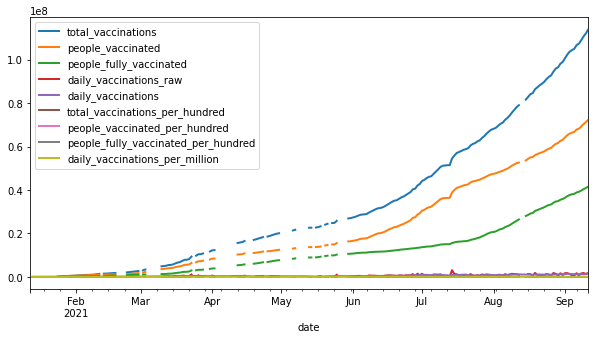

In [18]:
#plot untuk melihat keseluruhan data
df_indo_id.plot(figsize=(10,5),kind='line', linewidth=2)

**Melihat grafik total vaksin di Indonesia, terlihat data yang hilang dan harus diatasi. Bisa dengan dihilangkan maupun dengan diberikan nilai baru. Karena data ini merupakan time series, maka dihilangkan bukan solusi yang tepat, jadi harus digunakan nilai yang baru untuk menutup nilai yang hilang.**


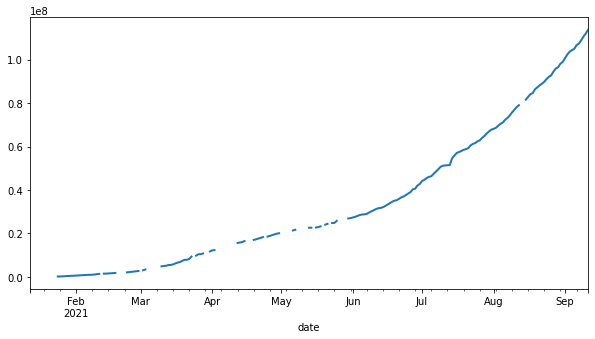

In [19]:
df_indo_id['total_vaccinations'].plot(figsize=(10,5),kind='line', linewidth=2)

**Menggunakan metode polinomial berorde 2 karena grafik cenderung mengikuti pola tersebut.**

In [22]:
df_inter=df_indo_id.interpolate(method="polynomial", order=2) # metode polynomial orde ke-2 (x^2)
df_inter.shape #Melihat jumlah data kembali

(243, 10)

**Melihat grafik dari total vaksin di Indonesia setelah digunakan metode polinomial**

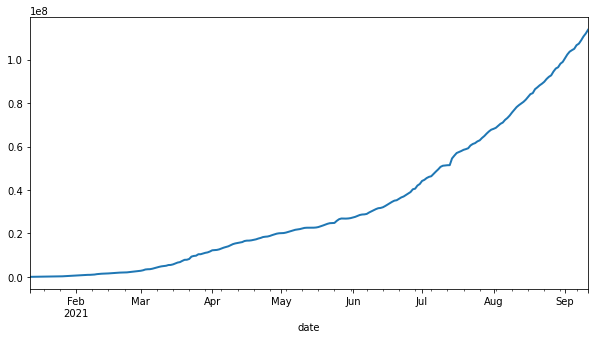

In [23]:
df_inter['total_vaccinations'].plot(figsize=(10,5),kind='line', linewidth=2)

**Grafik time series total vaksin setelah diberikan metode interpolasi (dengan grafik merah)**

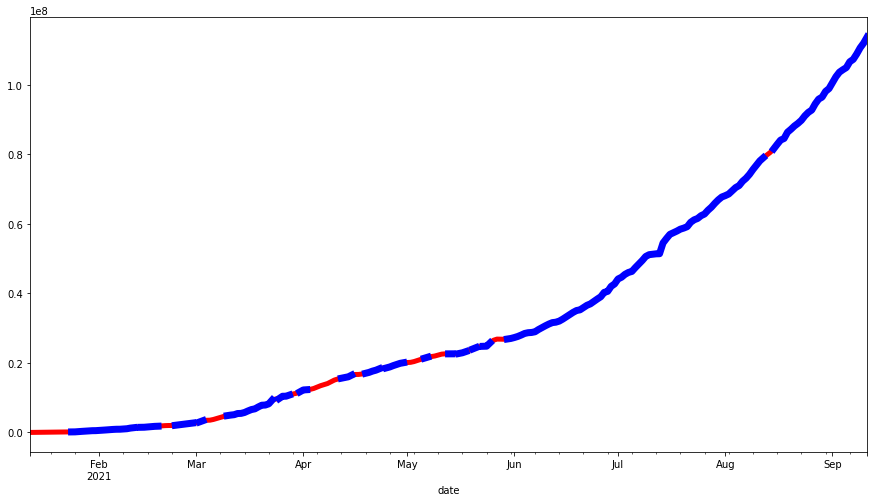

In [24]:
ax = df_inter['total_vaccinations'].plot(figsize=(15,8),kind='line', linewidth=5,color="red")
df_indo_id['total_vaccinations'].plot(ax=ax,color='blue',linewidth=7)

**Deskripsi data sebelum diinput nilai yang hilang**

In [26]:
df_indo.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.980000e+02,1.980000e+02,1.920000e+02,1.670000e+02,2.420000e+02,198.000000,198.000000,192.000000,242.000000
mean,3.689440e+07,2.443124e+07,1.285263e+07,5.923015e+05,4.514537e+05,13.350303,8.840051,4.650833,1633.566116
std,3.257431e+07,2.144125e+07,1.124092e+07,5.131055e+05,3.684994e+05,11.786612,7.758593,4.067422,1333.380606
min,0.000000e+00,0.000000e+00,5.468000e+03,5.162000e+03,1.182300e+04,0.000000,0.000000,0.000000,43.000000
25%,7.966569e+06,5.608512e+06,3.234723e+06,1.801380e+05,1.933342e+05,2.882500,2.025000,1.170000,699.750000
50%,2.782350e+07,1.690456e+07,1.112411e+07,4.696610e+05,2.989720e+05,10.065000,6.120000,4.025000,1082.000000
75%,6.016776e+07,4.325647e+07,1.730928e+07,8.883180e+05,7.712958e+05,21.775000,15.652500,6.260000,2790.750000
max,1.137831e+08,7.224872e+07,4.153434e+07,3.087420e+06,1.371546e+06,41.170000,26.140000,15.030000,4963.000000


**Deskripsi data setelah diinput nilai yang hilang**

In [29]:
df_inter.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.430000e+02,2.430000e+02,2.270000e+02,2.300000e+02,2.420000e+02,243.000000,243.000000,227.000000,242.000000
mean,3.272396e+07,2.160368e+07,1.190409e+07,5.111215e+05,4.514537e+05,11.841756,7.817395,4.307871,1633.566116
std,3.154357e+07,2.079332e+07,1.084153e+07,5.209938e+05,3.684994e+05,11.413285,7.523785,3.922870,1333.380606
min,0.000000e+00,0.000000e+00,5.468000e+03,-7.175934e+05,1.182300e+04,0.000000,0.000000,0.000000,43.000000
25%,5.460389e+06,4.002860e+06,3.127026e+06,1.189517e+05,1.933342e+05,1.975000,1.445000,1.130000,699.750000
50%,2.261921e+07,1.369726e+07,9.746522e+06,3.981300e+05,2.989720e+05,8.180000,4.960000,3.530000,1082.000000
75%,5.141911e+07,3.638160e+07,1.615843e+07,7.804428e+05,7.712958e+05,18.605000,13.165000,5.850000,2790.750000
max,1.137831e+08,7.224872e+07,4.153434e+07,3.087420e+06,1.371546e+06,41.170000,26.140000,15.030000,4963.000000


**Dari keseluruhan pengolahan tersebut dapat disimpulkan bahwa data tersebut berupa data time series. Pada data time series, menangani data yang hilang akan lebih baik dengan mengganti data yang hilang tersebut agar indeks waktu tidak berubah. Karena grafik data menyerupai grafik polinomial orde 2, maka interpolasi orde 2 untuk mengganti data yang hilang adalah cara terbaik.**

**Melihat outlier dengan membuat boxplot**

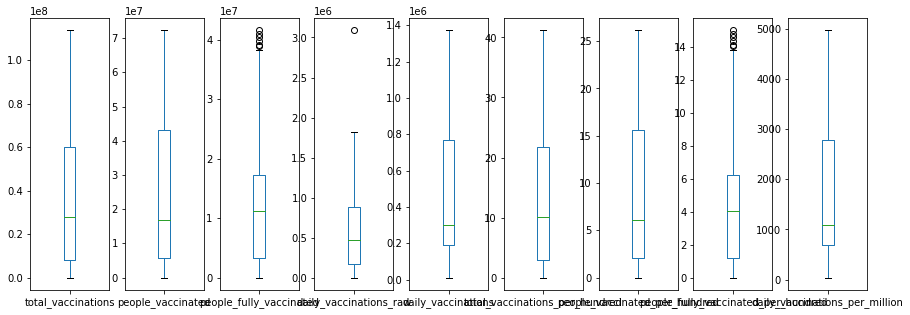

In [64]:
df_indo_id.plot(kind='box',subplots=True,layout=(1,9),sharex=False, figsize=(15,5))
plt.show()

**Dari boxplot tersebut, kita akan mengambil variabel daily_vaccionations_raw sebagai objek yang memilik outlier**

In [73]:
# menghapus nilai yang hilang dari variabel
df_selected = df_indo_id[['daily_vaccinations_raw']]
df_selected=df_selected.dropna()
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 2021-01-25 to 2021-09-11
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   daily_vaccinations_raw  167 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


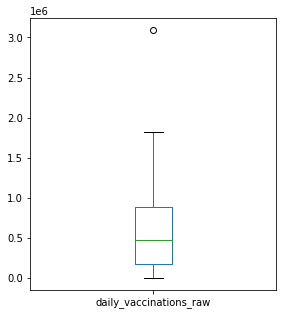

In [69]:
#melihat boxplot dari daily_vaccionations_raw setelah nilai yang hilang dikeluarkan
df_selected.plot(kind='box',subplots=True,layout=(1,3),sharex=False, figsize=(15,5))
plt.show()

**Menggunakan metode Z-Score untuk mengeluarkan outlier**

In [71]:
df_out=df_selected[(np.abs(stats.zscore(df_selected)) < 3).all(axis=1)]

**Boxplot hasil evaluasi outlier dengan metode Z-Score.**

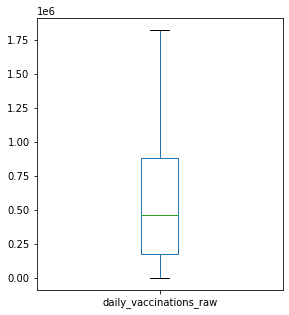

In [72]:
df_out.plot(kind='box',subplots=True,layout=(1,3),sharex=False, figsize=(15,5))
plt.show()

**Kesimpulan : Data Vaksin di Indonesia dapat diganti nilai yang hilangnya dengan interpolasi nominal derajat 2, dan outlier yang ada juga dapat di eliminasi dengan menghitung Z-Score**